In [1]:
from keras.applications import VGG166-632 #50-6rt5ng the network
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
vgg_conv.summary() #show summary

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [2]:
#set of directories
train_dir = './train_test/train'
validation_dir = './train_test/test'


#no. of images in training and validation
nTrain = 3241
nVal = 1082

In [3]:
#importint the main libraries
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

#data generator from keras
datagen = ImageDataGenerator(rescale=1./255, featurewise_std_normalization=True)

batch_size = 20

#Creates a numpy array of training and labels

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,5))
# reading the diretory and loading the data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break


train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

1.13.1


D:\anaconda3\envs\CVp2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3241 images belonging to 5 classes.


D:\anaconda3\envs\CVp2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
D:\anaconda3\envs\CVp2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
#configuring the GPU
import tensorflow as tf
gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.99)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
print(sess)

In [4]:
#importing the validation data using the generartor
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,5))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,   
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 1082 images belonging to 5 classes.


In [5]:
#Creating custom Densed Layer- Model

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation= tf.nn.softmax))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3241 samples, validate on 1082 samples
Epoch 1/30
3241/3241 [==============================] - 9s 3ms/step - loss: 1.2679 - acc: 0.5748 - val_loss: 1.0274 - val_acc: 0.5906
Epoch 2/30
3241/3241 [==============================] - 7s 2ms/step - loss: 0.6978 - acc: 0.7507 - val_loss: 0.9700 - val_acc: 0.6359
Epoch 3/30
3241/3241 [==============================] - 7s 2ms/step - loss: 0.5234 - acc: 0.8143 - val_loss: 0.7899 - val_acc: 0.7532
Epoch 4/30
3241/3241 [==============================] - 8s 3ms/step - loss: 0.4393 - acc: 0.8386 - val_loss: 0.6065 - val_acc: 0.7874
Epoch 5/30
3241/3241 [==============================] - 7s 2ms/step - loss: 0.3315 - acc: 0.8784 - val_loss: 0.6025 - val_acc: 0.7957
Epoch 6/30
3241/3241 [==============================] - 7s 2ms/step - loss: 0.2800 - acc: 0.9013 - val_loss: 0.7987 - v

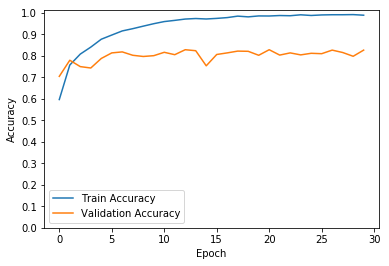

In [32]:
#plotting the graphs of accuracy
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

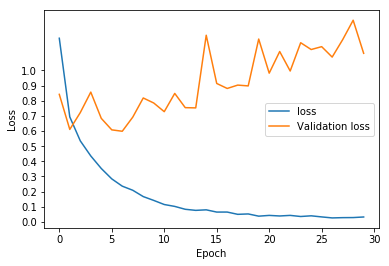

In [33]:
##plotting the graphs of loss
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(history.epoch, np.array(history.history['loss']),
 label='loss')
 plt.plot(history.epoch, np.array(history.history['val_loss']),
 label = 'Validation loss')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

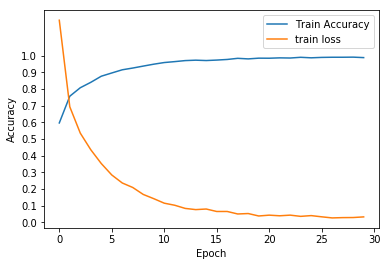

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['loss']),
 label = 'train loss')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

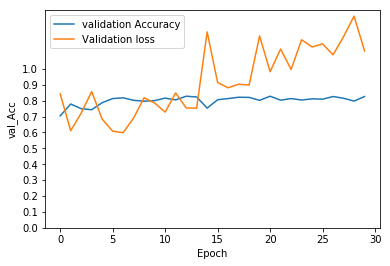

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('val_Acc')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label='validation Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_loss']),
 label = 'Validation loss')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)